<a href="https://colab.research.google.com/github/RoalcoAC/Laboratorios-text---image-Trimestre-3/blob/main/Laboratoio_1_I%26T.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pillow

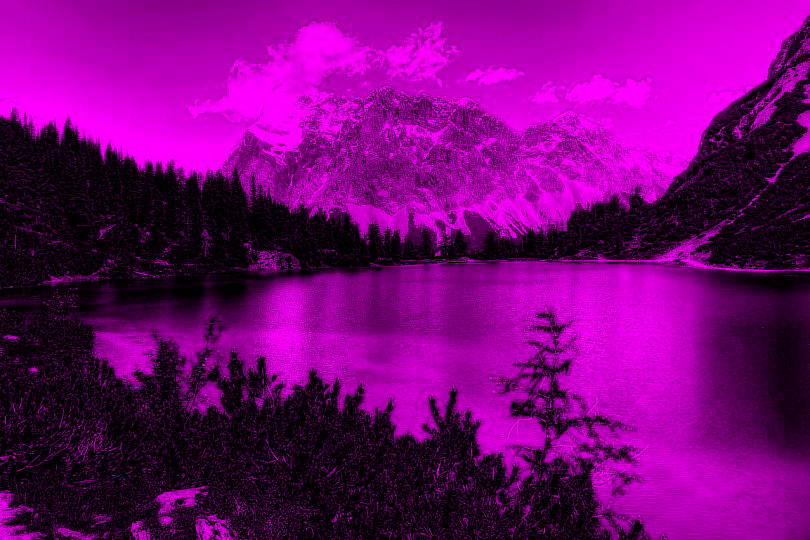

In [6]:
from PIL import Image

def activar_canales_color(imagen, color):
    # Convertir la imagen a modo "RGB" (por si está en otro modo)
    imagen_rgb = imagen.convert("RGB")
    width, height = imagen_rgb.size

    # Crear una nueva imagen con fondo negro y los mismos tamaños que la original
    nueva_imagen = Image.new("RGB", (width, height), (0, 0, 0))

    # Recorrer todos los píxeles de la imagen original y actualizar la nueva imagen
    for x in range(width):
        for y in range(height):
            pixel = imagen_rgb.getpixel((x, y))
            if color == 1:
                # Mostrar solo el canal azul (rojo y verde apagados)
                nueva_imagen.putpixel((x, y), (0, 0, pixel[2]))
            elif color == 2:
                # Mostrar solo el canal verde (rojo y azul apagados)
                nueva_imagen.putpixel((x, y), (0, pixel[1], 0))
            elif color == 3:
                # Mostrar solo el canal rojo (verde y azul apagados)
                nueva_imagen.putpixel((x, y), (pixel[0], 0, 0))
            elif color == 10:
                # Mostrar solo los canales rojo y verde (azul apagado)
                nueva_imagen.putpixel((x, y), (pixel[0], pixel[1], 0))
            elif color == 20:
                # Mostrar solo los canales verde y azul (rojo apagado)
                nueva_imagen.putpixel((x, y), (0, pixel[1], pixel[2]))
            elif color == 30:
                # Mostrar solo los canales azul y rojo (verde apagado)
                nueva_imagen.putpixel((x, y), (pixel[0], 0, pixel[2]))

    return nueva_imagen

# Ejemplo de uso:
ruta_imagen = "imagen1_salida_gray_azul.jpg"  # Reemplaza esto con la ruta de tu imagen
imagen = Image.open(ruta_imagen)

imagen_azul = activar_canales_color(imagen, 30)
imagen_azul.show()  # Mostrar la imagen resultante con solo el canal azul activo

# Repite el proceso para las otras combinaciones según sea necesario.


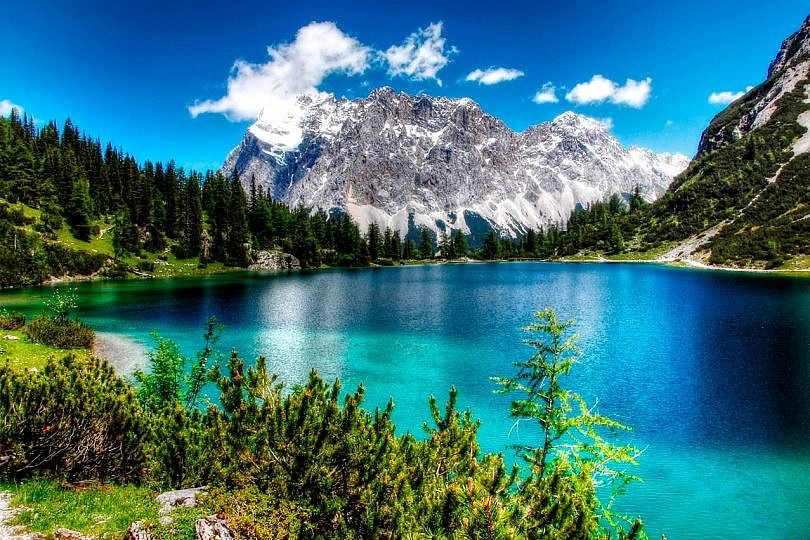

In [7]:
from PIL import Image

def construir_imagen_color(imagen_rojo, imagen_verde, imagen_azul):
    # Asegurarnos de que las imágenes sean del mismo tamaño
    assert imagen_rojo.size == imagen_verde.size == imagen_azul.size, "Las imágenes no tienen el mismo tamaño"

    # Convertir las imágenes a modo "L" (escala de grises) si no están en ese modo
    imagen_rojo = imagen_rojo.convert("L")
    imagen_verde = imagen_verde.convert("L")
    imagen_azul = imagen_azul.convert("L")

    width, height = imagen_rojo.size

    # Crear una nueva imagen en modo "RGB" para la imagen a color
    imagen_color = Image.new("RGB", (width, height), (0, 0, 0))

    # Recorrer todos los píxeles de las imágenes de los canales y combinarlos
    for x in range(width):
        for y in range(height):
            valor_rojo = imagen_rojo.getpixel((x, y))
            valor_verde = imagen_verde.getpixel((x, y))
            valor_azul = imagen_azul.getpixel((x, y))

            # Crear el píxel a color combinando los canales
            pixel_color = (valor_rojo, valor_verde, valor_azul)
            imagen_color.putpixel((x, y), pixel_color)

    return imagen_color

# Ejemplo de uso:
ruta_imagen_rojo = "imagen1_salida_gray_rojo.jpg"  # Reemplaza esto con la ruta de la imagen roja en escala de grises
ruta_imagen_verde = "imagen1_salida_gray_verde.jpg"  # Reemplaza esto con la ruta de la imagen verde en escala de grises
ruta_imagen_azul = "imagen1_salida_gray_azul.jpg"  # Reemplaza esto con la ruta de la imagen azul en escala de grises

imagen_rojo = Image.open(ruta_imagen_rojo)
imagen_verde = Image.open(ruta_imagen_verde)
imagen_azul = Image.open(ruta_imagen_azul)

imagen_a_color = construir_imagen_color(imagen_rojo, imagen_verde, imagen_azul)
imagen_a_color.show()  # Mostrar la imagen a color resultante


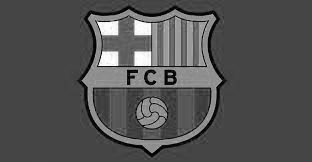

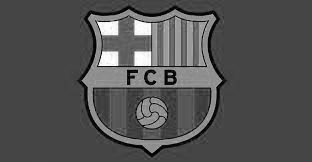

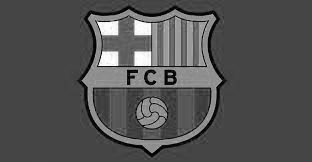

In [8]:
from PIL import Image

def escala_grises_tres_dimensiones(imagen):
    # Convertir la imagen a modo "RGB" (por si está en otro modo)
    imagen_rgb = imagen.convert("RGB")
    width, height = imagen_rgb.size

    # Crear tres imágenes en modo "L" (escala de grises) para los canales rojo, verde y azul
    imagen_rojo = Image.new("L", (width, height))
    imagen_verde = Image.new("L", (width, height))
    imagen_azul = Image.new("L", (width, height))

    # Recorrer todos los píxeles de la imagen original y asignar los valores a los canales de color
    for x in range(width):
        for y in range(height):
            pixel = imagen_rgb.getpixel((x, y))

            # Asignar el mismo valor de intensidad a los canales de color para obtener escala de grises
            intensidad = sum(pixel) // 3
            imagen_rojo.putpixel((x, y), intensidad)
            imagen_verde.putpixel((x, y), intensidad)
            imagen_azul.putpixel((x, y), intensidad)

    return imagen_rojo, imagen_verde, imagen_azul

# Ejemplo de uso con una imagen de prueba
ruta_imagen_prueba = "download.jpg"  # Reemplaza esto con la ruta de la imagen de prueba
imagen_prueba = Image.open(ruta_imagen_prueba)

imagen_rojo, imagen_verde, imagen_azul = escala_grises_tres_dimensiones(imagen_prueba)

# Mostrar las imágenes resultantes
imagen_rojo.show()
imagen_verde.show()
imagen_azul.show()


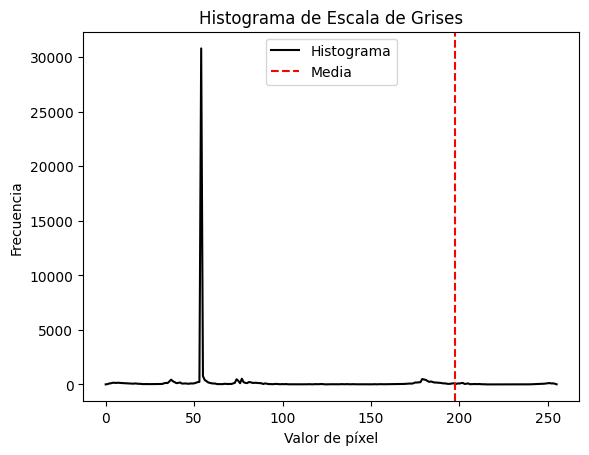

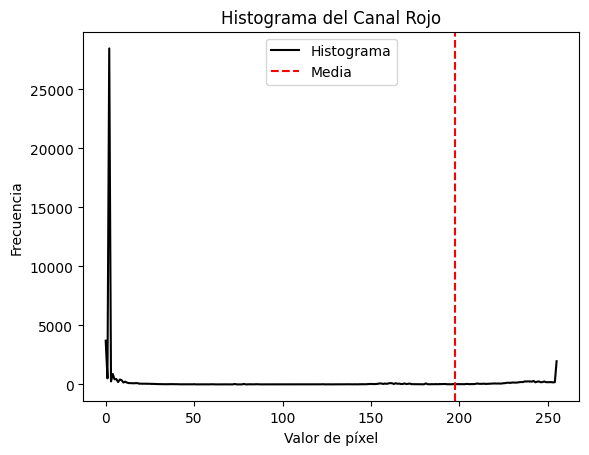

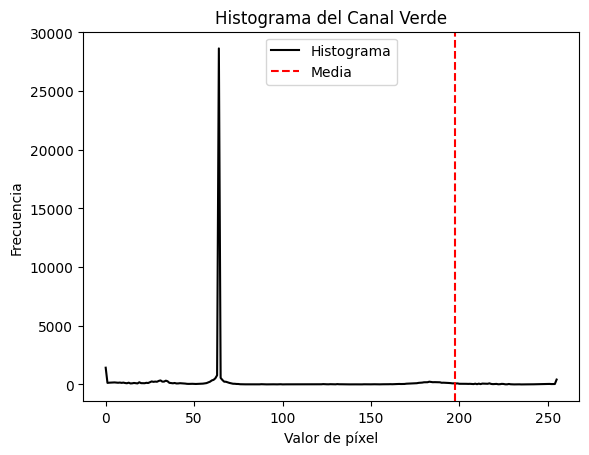

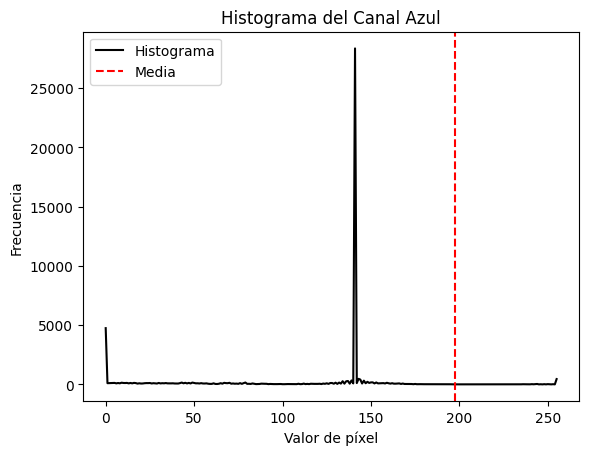

In [9]:
from PIL import Image
import matplotlib.pyplot as plt

def calcular_histograma(imagen):
    # Convertir la imagen a modo "L" (escala de grises) si no está en ese modo
    imagen_gris = imagen.convert("L")

    # Calcular el histograma de la imagen en escala de grises
    histograma_gris = imagen_gris.histogram()

    # Calcular el histograma de cada canal de color RGB
    histograma_rojo = imagen.histogram()[0:256]
    histograma_verde = imagen.histogram()[256:512]
    histograma_azul = imagen.histogram()[512:768]

    return histograma_gris, histograma_rojo, histograma_verde, histograma_azul

def mostrar_histograma_con_media(histograma, titulo):
    # Calcular la media del histograma
    media_histograma = sum(histograma) / len(histograma)

    # Crear la figura y el eje
    fig, ax = plt.subplots()

    # Mostrar el histograma
    ax.plot(histograma, color='black', label='Histograma')
    ax.axvline(x=media_histograma, color='red', linestyle='dashed', linewidth=1.5, label='Media')

    # Configurar el eje y las etiquetas
    ax.set_xlabel('Valor de píxel')
    ax.set_ylabel('Frecuencia')
    ax.set_title(titulo)
    ax.legend()

    # Mostrar el gráfico
    plt.show()

# Ejemplo de uso con una imagen de prueba
ruta_imagen_prueba = "download.jpg"  # Reemplaza esto con la ruta de la imagen de prueba
imagen_prueba = Image.open(ruta_imagen_prueba)

# Calcular los histogramas
histograma_gris, histograma_rojo, histograma_verde, histograma_azul = calcular_histograma(imagen_prueba)

# Mostrar los histogramas con la línea vertical de la media
mostrar_histograma_con_media(histograma_gris, 'Histograma de Escala de Grises')
mostrar_histograma_con_media(histograma_rojo, 'Histograma del Canal Rojo')
mostrar_histograma_con_media(histograma_verde, 'Histograma del Canal Verde')
mostrar_histograma_con_media(histograma_azul, 'Histograma del Canal Azul')
